In [84]:
# binary
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["target"]).values, df["target"].values,
    test_size=0.2,
    random_state=42
)

# Convergence is very slow without scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Disable regularization: score = 0.94
classifier = LogisticRegression(penalty=None)
# # "l2" regularization => 0.97
# classifier = LogisticRegression(penalty="l2")
# "l1" regularization => 0.97
# classifier = LogisticRegression(penalty="l1", solver="liblinear")

classifier.fit(X_train, y_train)
classifier.score(
    scaler.transform(X_test),
    y_test
)

0.9385964912280702

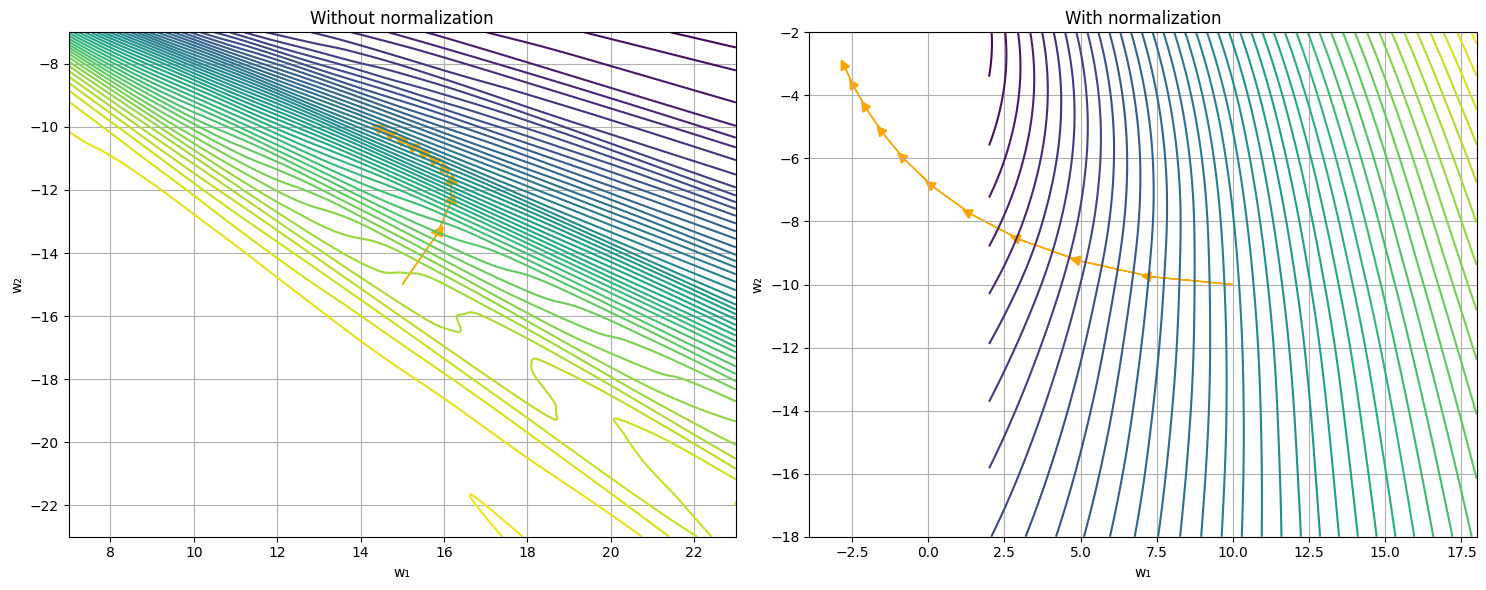

In [79]:
from plot_utils import plot_gd_progress

X2 = df.iloc[:, :2].values
y = df["target"].values

# Without normalization, the contour is zagged
# making convergence really slow
plot_gd_progress(X2, y)

In [82]:
feature_importances = {
    f: imp for f, imp in zip(data.feature_names, classifier.coef_[0])
}
feature_importances = dict(
    sorted(
        feature_importances.items(),
        key=lambda x: abs(x[1]),
        reverse=True
    )
)
feature_importances

{np.str_('mean compactness'): np.float64(274.94009817577086),
 np.str_('mean concave points'): np.float64(-266.1847360574983),
 np.str_('radius error'): np.float64(-259.63946217011926),
 np.str_('concavity error'): np.float64(246.60809324621965),
 np.str_('worst concavity'): np.float64(-244.05971134708034),
 np.str_('worst symmetry'): np.float64(-169.65485479840666),
 np.str_('mean fractal dimension'): np.float64(-168.01794604238884),
 np.str_('area error'): np.float64(-167.389401313204),
 np.str_('mean concavity'): np.float64(-134.83815840423597),
 np.str_('fractal dimension error'): np.float64(131.93923411946895),
 np.str_('perimeter error'): np.float64(115.35011388969431),
 np.str_('worst radius'): np.float64(-105.87135969188941),
 np.str_('worst area'): np.float64(-103.73668988078082),
 np.str_('compactness error'): np.float64(-97.5741303028033),
 np.str_('symmetry error'): np.float64(95.95418597098947),
 np.str_('worst smoothness'): np.float64(93.97496150949047),
 np.str_('worst t

w1 = 1.2081495220013243  w2 = -5.445004950183148  b = 0.5103868942596351


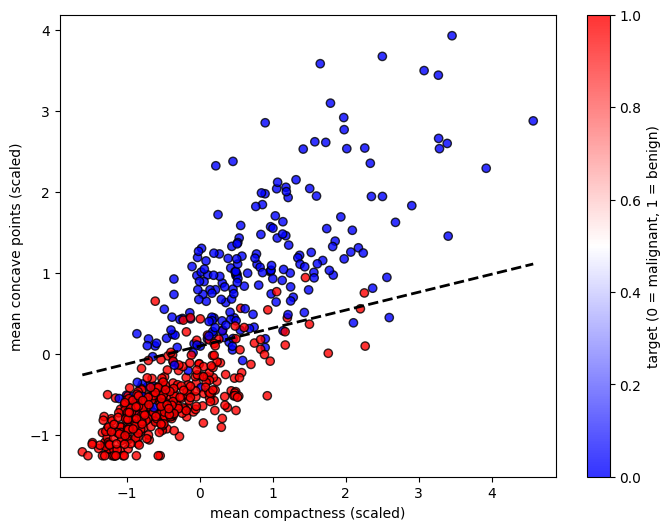

In [76]:
# Looks like two most important features separates the two classes pretty well 
# needing only a straightline decision boundary

import numpy as np
import matplotlib.pyplot as plt

# Select two features
X2 = df[["mean compactness", "mean concave points"]].values
y = df["target"].values

X2_scaled = scaler.fit_transform(X2)

# Train logistic regression on these two features ONLY
clf = LogisticRegression(penalty=None)
clf.fit(X2_scaled, y)

w1, w2 = clf.coef_[0]
b = clf.intercept_[0]

print("w1 =", w1, " w2 =", w2, " b =", b)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=y, cmap="bwr", edgecolors="k", alpha=0.8)
plt.xlabel("mean compactness (scaled)")
plt.ylabel("mean concave points (scaled)")
plt.colorbar(label="target (0 = malignant, 1 = benign)")

# Decision boundary line: w1*x + w2*y + b = 0 → y = -(w1*x + b)/w2
x_vals = np.linspace(X2_scaled[:,0].min(), X2_scaled[:,0].max(), 100)
y_vals = -(w1 * x_vals + b) / w2

plt.plot(x_vals, y_vals, "k--", linewidth=2)
plt.show()
